In [5]:
# Asegúrate de que la ruta al archivo sea correcta
include("ClusterProperties.jl")
using .ClusterPhysicsModule



In [1]:
include("ClusterDynamics.jl") # Si guardaste el código en un archivo separado.

simulate (generic function with 1 method)

In [2]:
params = Dict(
    "temperature" => 668,
    "activation_energy" => 52920.2,  # Convertir a joules si es necesario
    "diffusivity_factor" => 2e-9,
    "jump_distance" => 4.6e-10,
    "molar_mass" => 51.9961*1e-3,
    "mass_density" => 7.19*1e3,
    "melting_point" => 2130,
    "heat_fusion" => 20.48 * 1e3,  # Asegurarse de que las unidades sean consistentes
    "sigma" =>  1.0,
    "supersaturation_ratio" => 1.1,
    "method" => "melting"
)


Dict{String, Any} with 11 entries:
  "method"                => "melting"
  "mass_density"          => 7190.0
  "temperature"           => 668
  "sigma"                 => 1.0
  "diffusivity_factor"    => 2.0e-9
  "supersaturation_ratio" => 1.1
  "melting_point"         => 2130
  "heat_fusion"           => 20480.0
  "molar_mass"            => 0.0519961
  "jump_distance"         => 4.6e-10
  "activation_energy"     => 52920.2

In [2]:
params = Dict(
    "temperature" => 750,
    "activation_energy" => 52920.2,  # Convertir a joules si es necesario
    "diffusivity_factor" => 2e-9,
    "jump_distance" => 4.6e-10,
    "molar_mass" => 150.05*1e-3,
    "mass_density" => 2500,
    "melting_point" => 1300,
    "heat_fusion" => 52 * 1e3,  # Asegurarse de que las unidades sean consistentes
    "sigma" => 0.15,
    "supersaturation_ratio" => 1.1,
    "method" => "melting"
)


Dict{String, Any} with 11 entries:
  "method"                => "melting"
  "mass_density"          => 2500
  "temperature"           => 750
  "sigma"                 => 0.15
  "diffusivity_factor"    => 2.0e-9
  "supersaturation_ratio" => 1.1
  "melting_point"         => 1300
  "heat_fusion"           => 52000.0
  "molar_mass"            => 0.15005
  "jump_distance"         => 4.6e-10
  "activation_energy"     => 52920.2

In [12]:
MAX_NUMBER_MOLECULES = 5000
number_clusters_start = 2
#dt = 1e-8/unbiased_jump_rate(cluster_physics)
dt = 1e18

dn = JuliaClusterDynamics(params, 1e7, dt, number_clusters_start, MAX_NUMBER_MOLECULES, "closed");

In [13]:
# Llama a simulate! para ejecutar la simulación y almacenar la solución
@time solution = simulate(dn; method=Rodas4(), rtol=1e-8, atol=1e-8);


 79.024213 seconds (11.13 k allocations: 593.695 MiB, 0.11% gc time)


In [5]:
solution[50,end]

6.944659637610141e-144

In [6]:
density_equilibrium = zeros(Float64, MAX_NUMBER_MOLECULES)
cluster_physics = ClusterPhysics(params)
for i in 1:MAX_NUMBER_MOLECULES
    density_equilibrium[i] = number_density_equilibrium(cluster_physics, i)
end

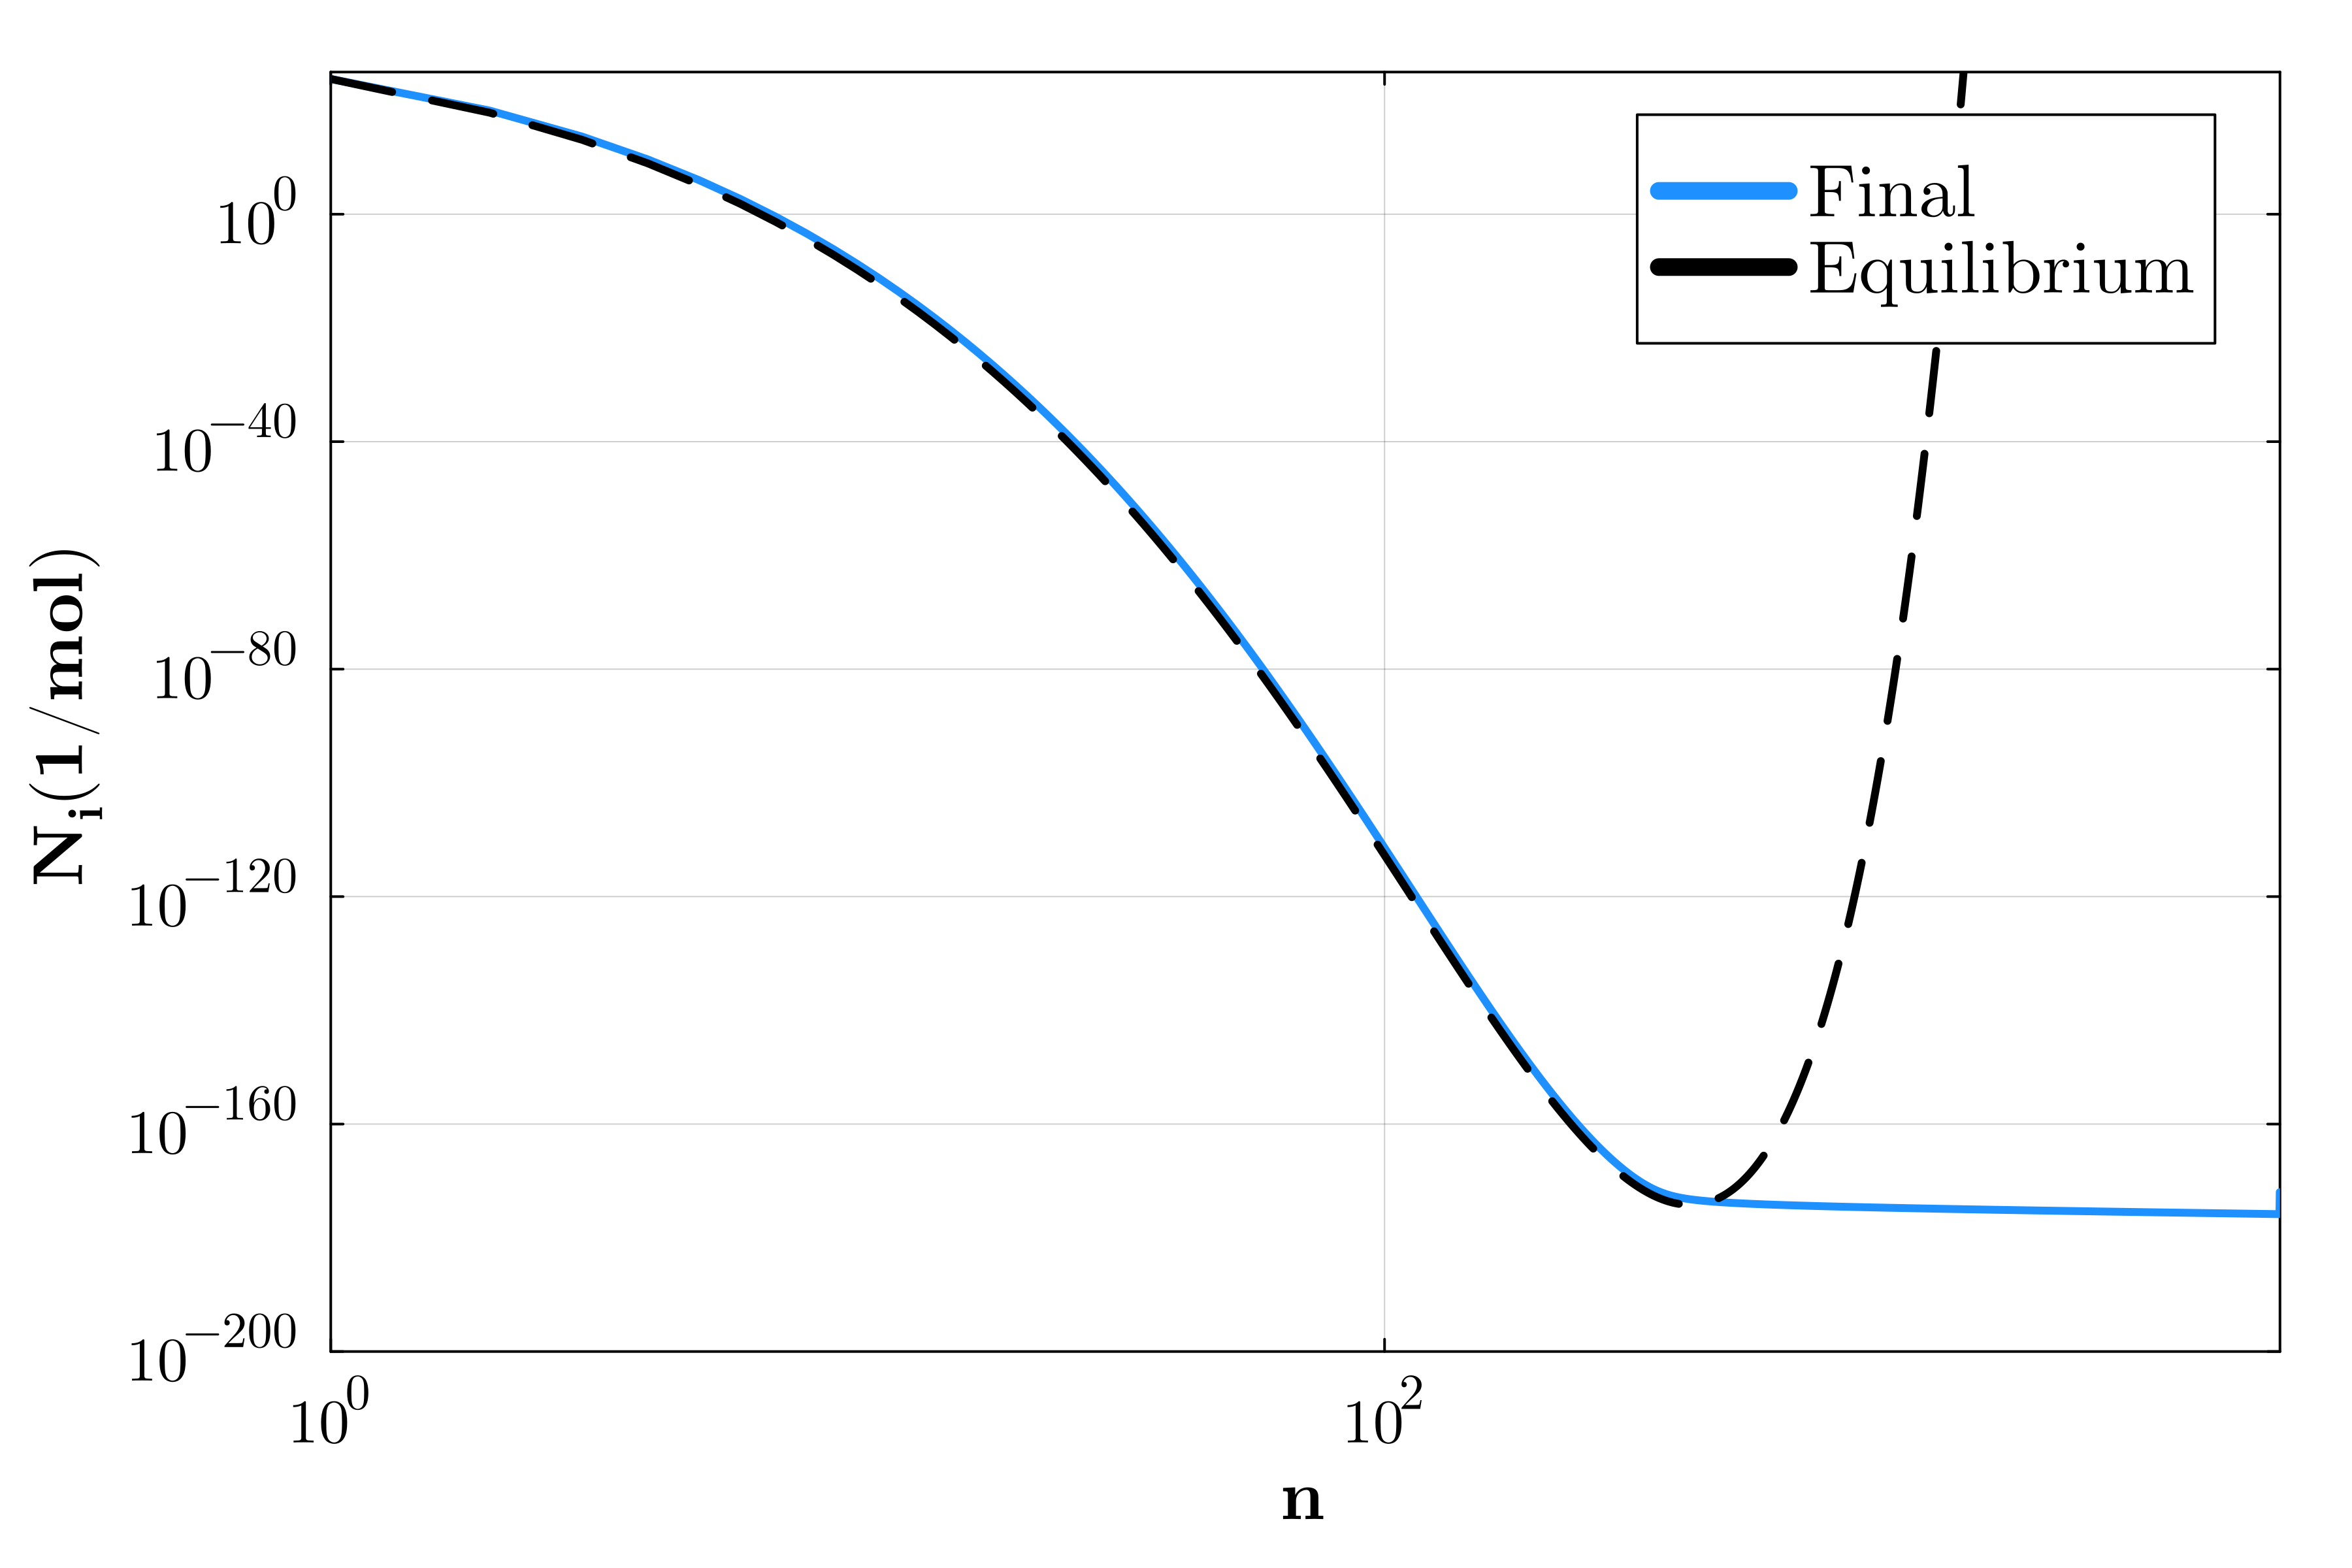

In [14]:
using Plots
# Asegúrate de tener LaTeXStrings para usar LaTeX en etiquetas y títulos
using LaTeXStrings

# Establece el backend y el tamaño del gráfico
gr(size=(600, 600))

number_molecules_array = collect(1:MAX_NUMBER_MOLECULES)

# Define colores más atractivos
colores = [:dodgerblue, :coral]

# Ajustes de estilo global para las gráficas
default(
    framestyle=:box,
    legend=:topright,
    line=(:solid, 3),  # Aumenta el grosor de las líneas
    fontfamily="Computer Modern",  # Esto es lo más cercano a un estilo LaTeX clásico
    size=(900, 600),  # Ajusta el tamaño de la gráfica aquí si no se ajustó antes
    dpi=400
)


# Escala de los ejes y etiquetas en formato LaTeX con un tamaño de fuente más grande
plot(number_molecules_array, solution[:, end], yscale=:log10, xscale=:log10, label="Final",
    xlims=(1, MAX_NUMBER_MOLECULES+5), ylims=(1e-200,1e25), yticks=10.0 .^ (-200:40:25),
    legendfontsize=12, titlefontsize=14, guidefontsize=12, tickfontsize=10,
    margin=5Plots.mm,
    color=colores[1])

#plot!(number_molecules_array, solution[:, 350], yscale=:log10, label="step 400",
#)

# plot!(number_molecules_array, solution[:, 300], yscale=:log10, label="step 300",
# )
    
# plot!(number_molecules_array, solution[:, 250], yscale=:log10, label="step 250",
# )
 
# plot!(number_molecules_array, solution[:, 100], yscale=:log10, label="step 100",
# )

plot!(number_molecules_array, density_equilibrium, yscale=:log10, label="Equilibrium",color = :black, linestyle=:dash,
)

# Personalizar aún más con LaTeXStrings si es necesario
plot!(xlabel=L"\mathbf{n}", ylabel=L"\mathbf{N_i (1/mol)}",
      legendfontsize=18, guidefontsize=18, tickfontsize=15)

# Mostrar el gráfico


┌ Warning: Invalid negative or zero value 0.0 found at series index 367 for log10 based yscale
└ @ Plots /home/alexandre_sureda/.julia/packages/Plots/HyyIK/src/utils.jl:106
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /home/alexandre_sureda/.julia/packages/Plots/HyyIK/src/utils.jl:106


┌ Warning: Invalid negative or zero value 0.0 found at series index 367 for log10 based yscale
└ @ Plots /home/alexandre_sureda/.julia/packages/Plots/HyyIK/src/utils.jl:106
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /home/alexandre_sureda/.julia/packages/Plots/HyyIK/src/utils.jl:106


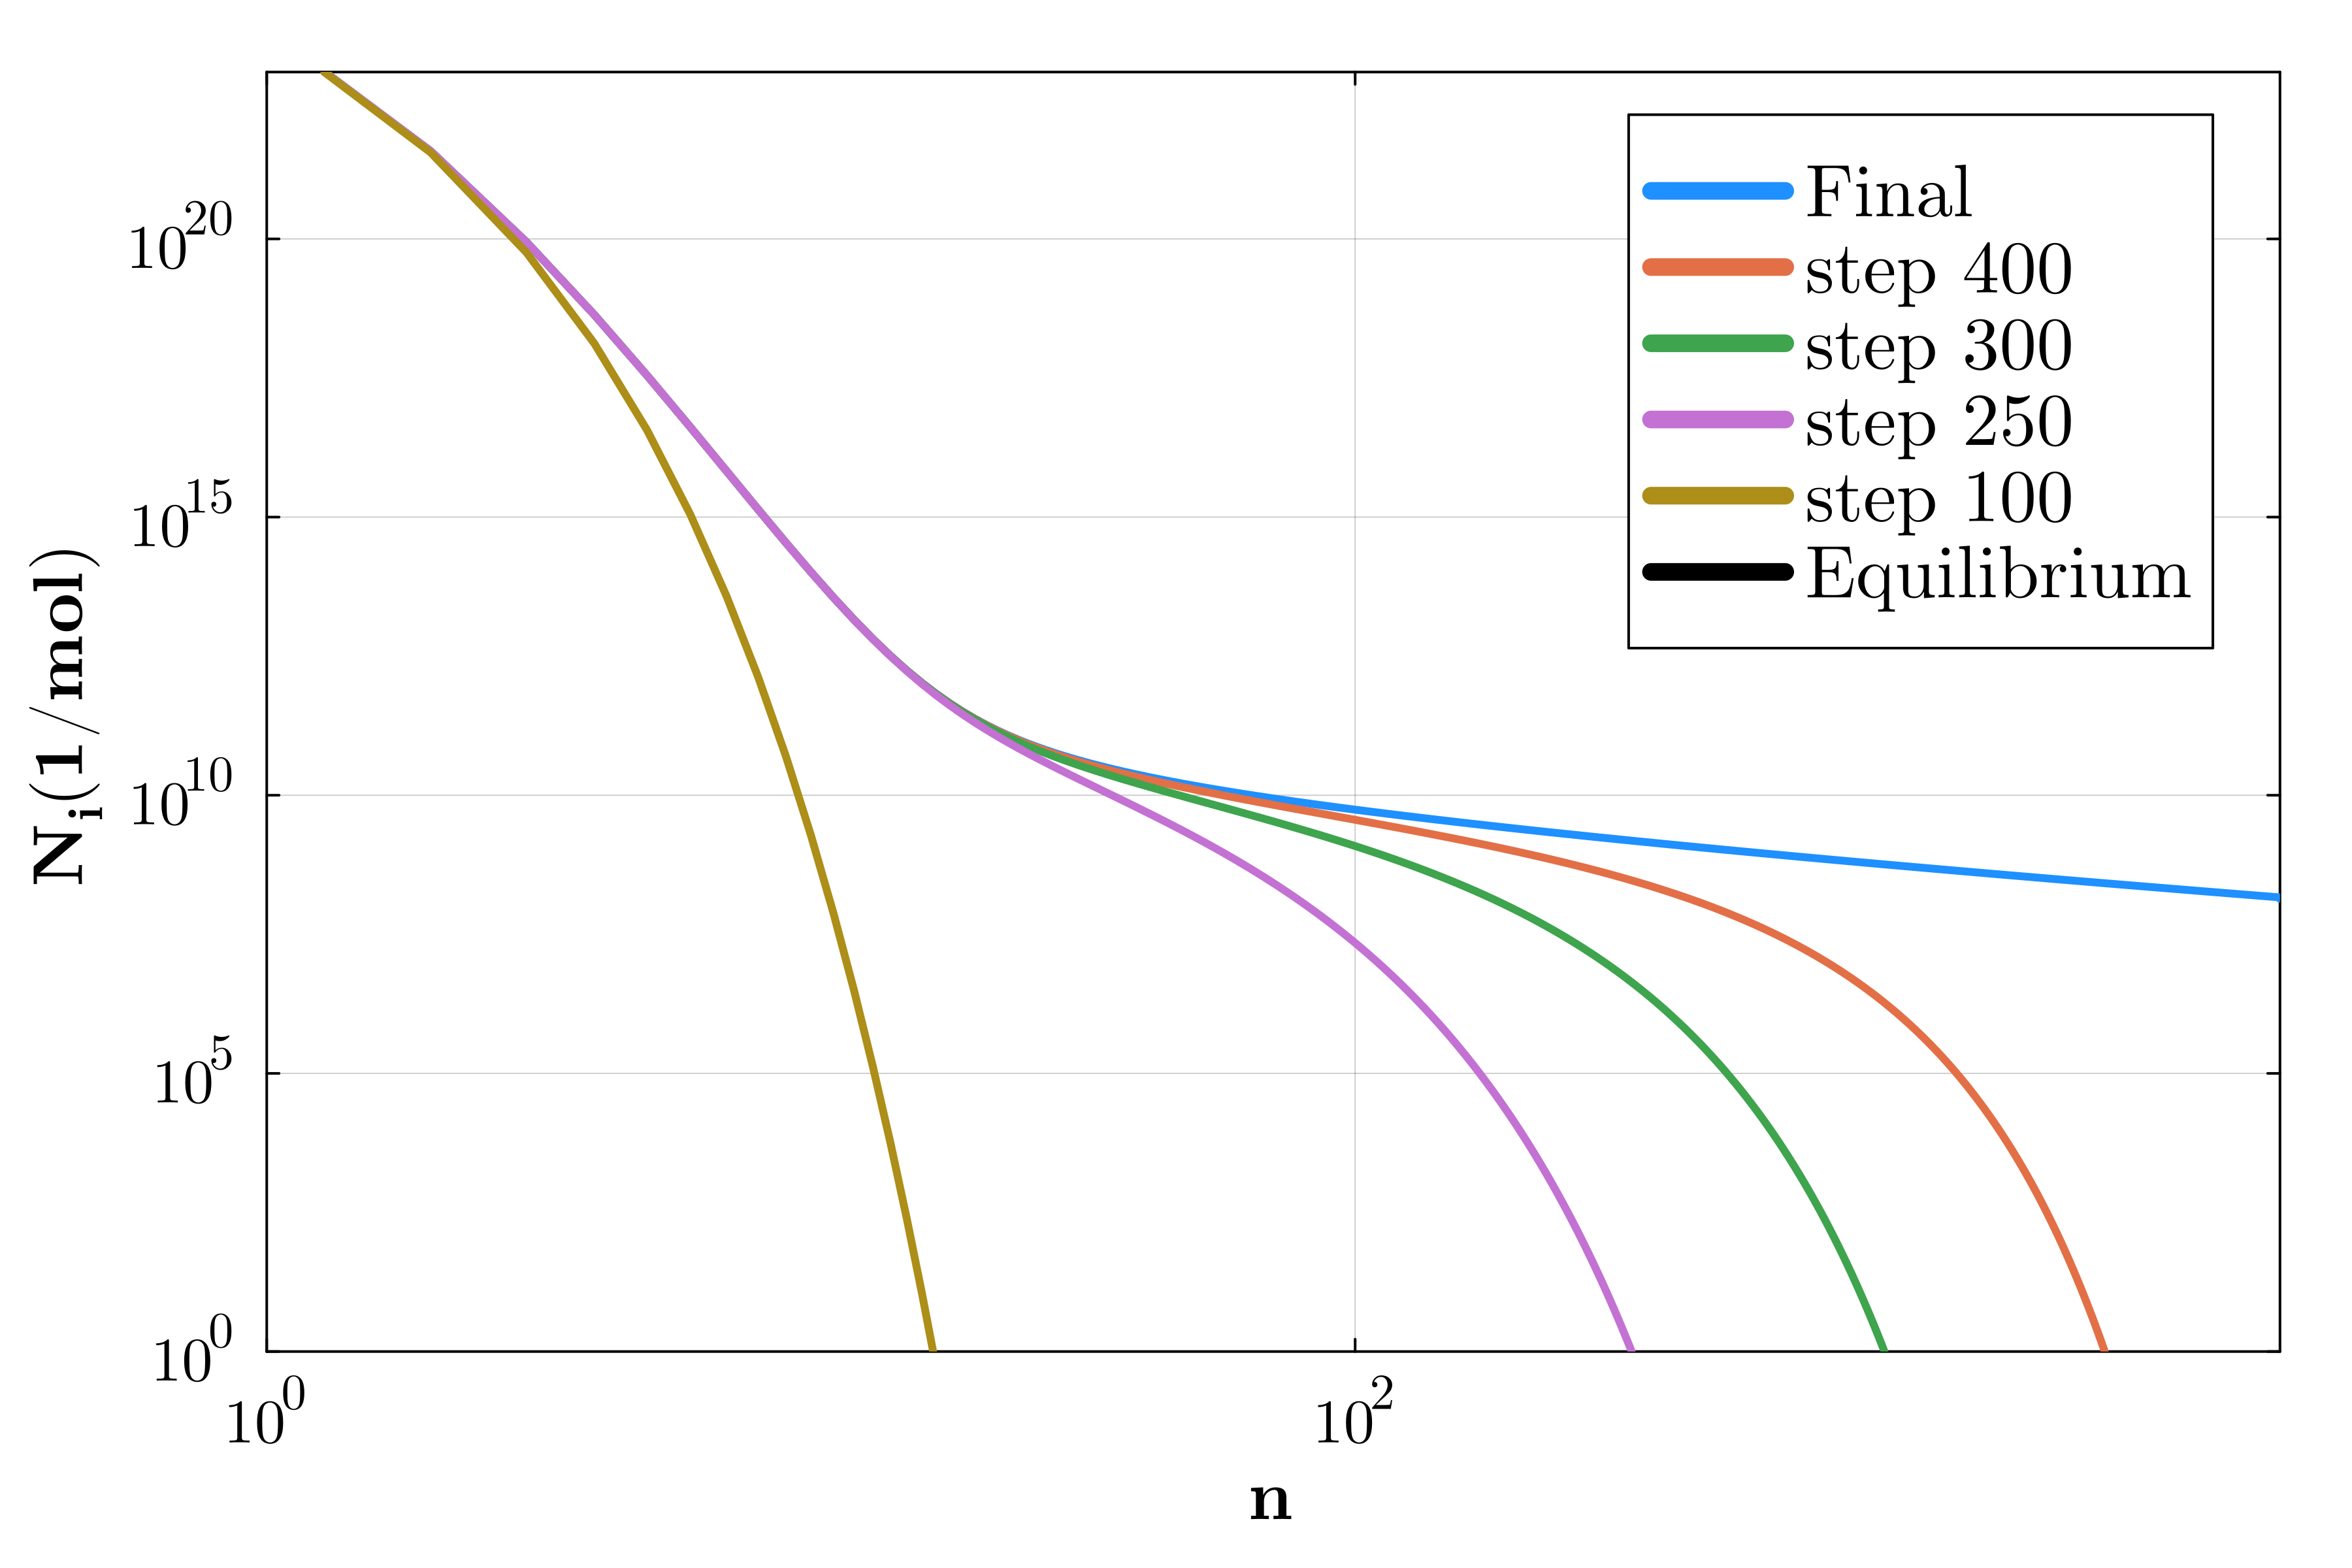

┌ Warning: Invalid negative or zero value 0.0 found at series index 367 for log10 based yscale
└ @ Plots /home/alexandre_sureda/.julia/packages/Plots/HyyIK/src/utils.jl:106
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /home/alexandre_sureda/.julia/packages/Plots/HyyIK/src/utils.jl:106


In [8]:
using Plots
# Asegúrate de tener LaTeXStrings para usar LaTeX en etiquetas y títulos
using LaTeXStrings

# Establece el backend y el tamaño del gráfico
gr(size=(000, 600))

number_molecules_array = collect(1:MAX_NUMBER_MOLECULES)

# Define colores más atractivos
colores = [:dodgerblue, :coral]

# Ajustes de estilo global para las gráficas
default(
    framestyle=:box,
    legend=:topright,
    line=(:solid, 3),  # Aumenta el grosor de las líneas
    fontfamily="Computer Modern",  # Esto es lo más cercano a un estilo LaTeX clásico
    size=(900, 600),  # Ajusta el tamaño de la gráfica aquí si no se ajustó antes
    dpi=400
)


# Escala de los ejes y etiquetas en formato LaTeX con un tamaño de fuente más grande
plot(number_molecules_array, solution[:, end], yscale=:log10, xscale=:log10, label="Final",
    xlims=(1, MAX_NUMBER_MOLECULES+5), ylims=(1,1e23), yticks=10.0 .^ (-20:5:20),
    legendfontsize=12, titlefontsize=14, guidefontsize=12, tickfontsize=10,
    margin=5Plots.mm,
    color=colores[1])

plot!(number_molecules_array, solution[:, 350], yscale=:log10, label="step 400",
)


plot!(number_molecules_array, solution[:, 300], yscale=:log10, label="step 300",
)
    
plot!(number_molecules_array, solution[:, 250], yscale=:log10, label="step 250",
)
 
plot!(number_molecules_array, solution[:, 100], yscale=:log10, label="step 100",
)

plot!(number_molecules_array, density_equilibrium, yscale=:log10, label="Equilibrium",color = :black, linestyle=:dash,
)

# Personalizar aún más con LaTeXStrings si es necesario
plot!(xlabel=L"\mathbf{n}", ylabel=L"\mathbf{N_i (1/mol)}",
      legendfontsize=18, guidefontsize=18, tickfontsize=15)

# Mostrar el gráfico


┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /home/alexandre_sureda/.julia/packages/Plots/HyyIK/src/utils.jl:106
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /home/alexandre_sureda/.julia/packages/Plots/HyyIK/src/utils.jl:106


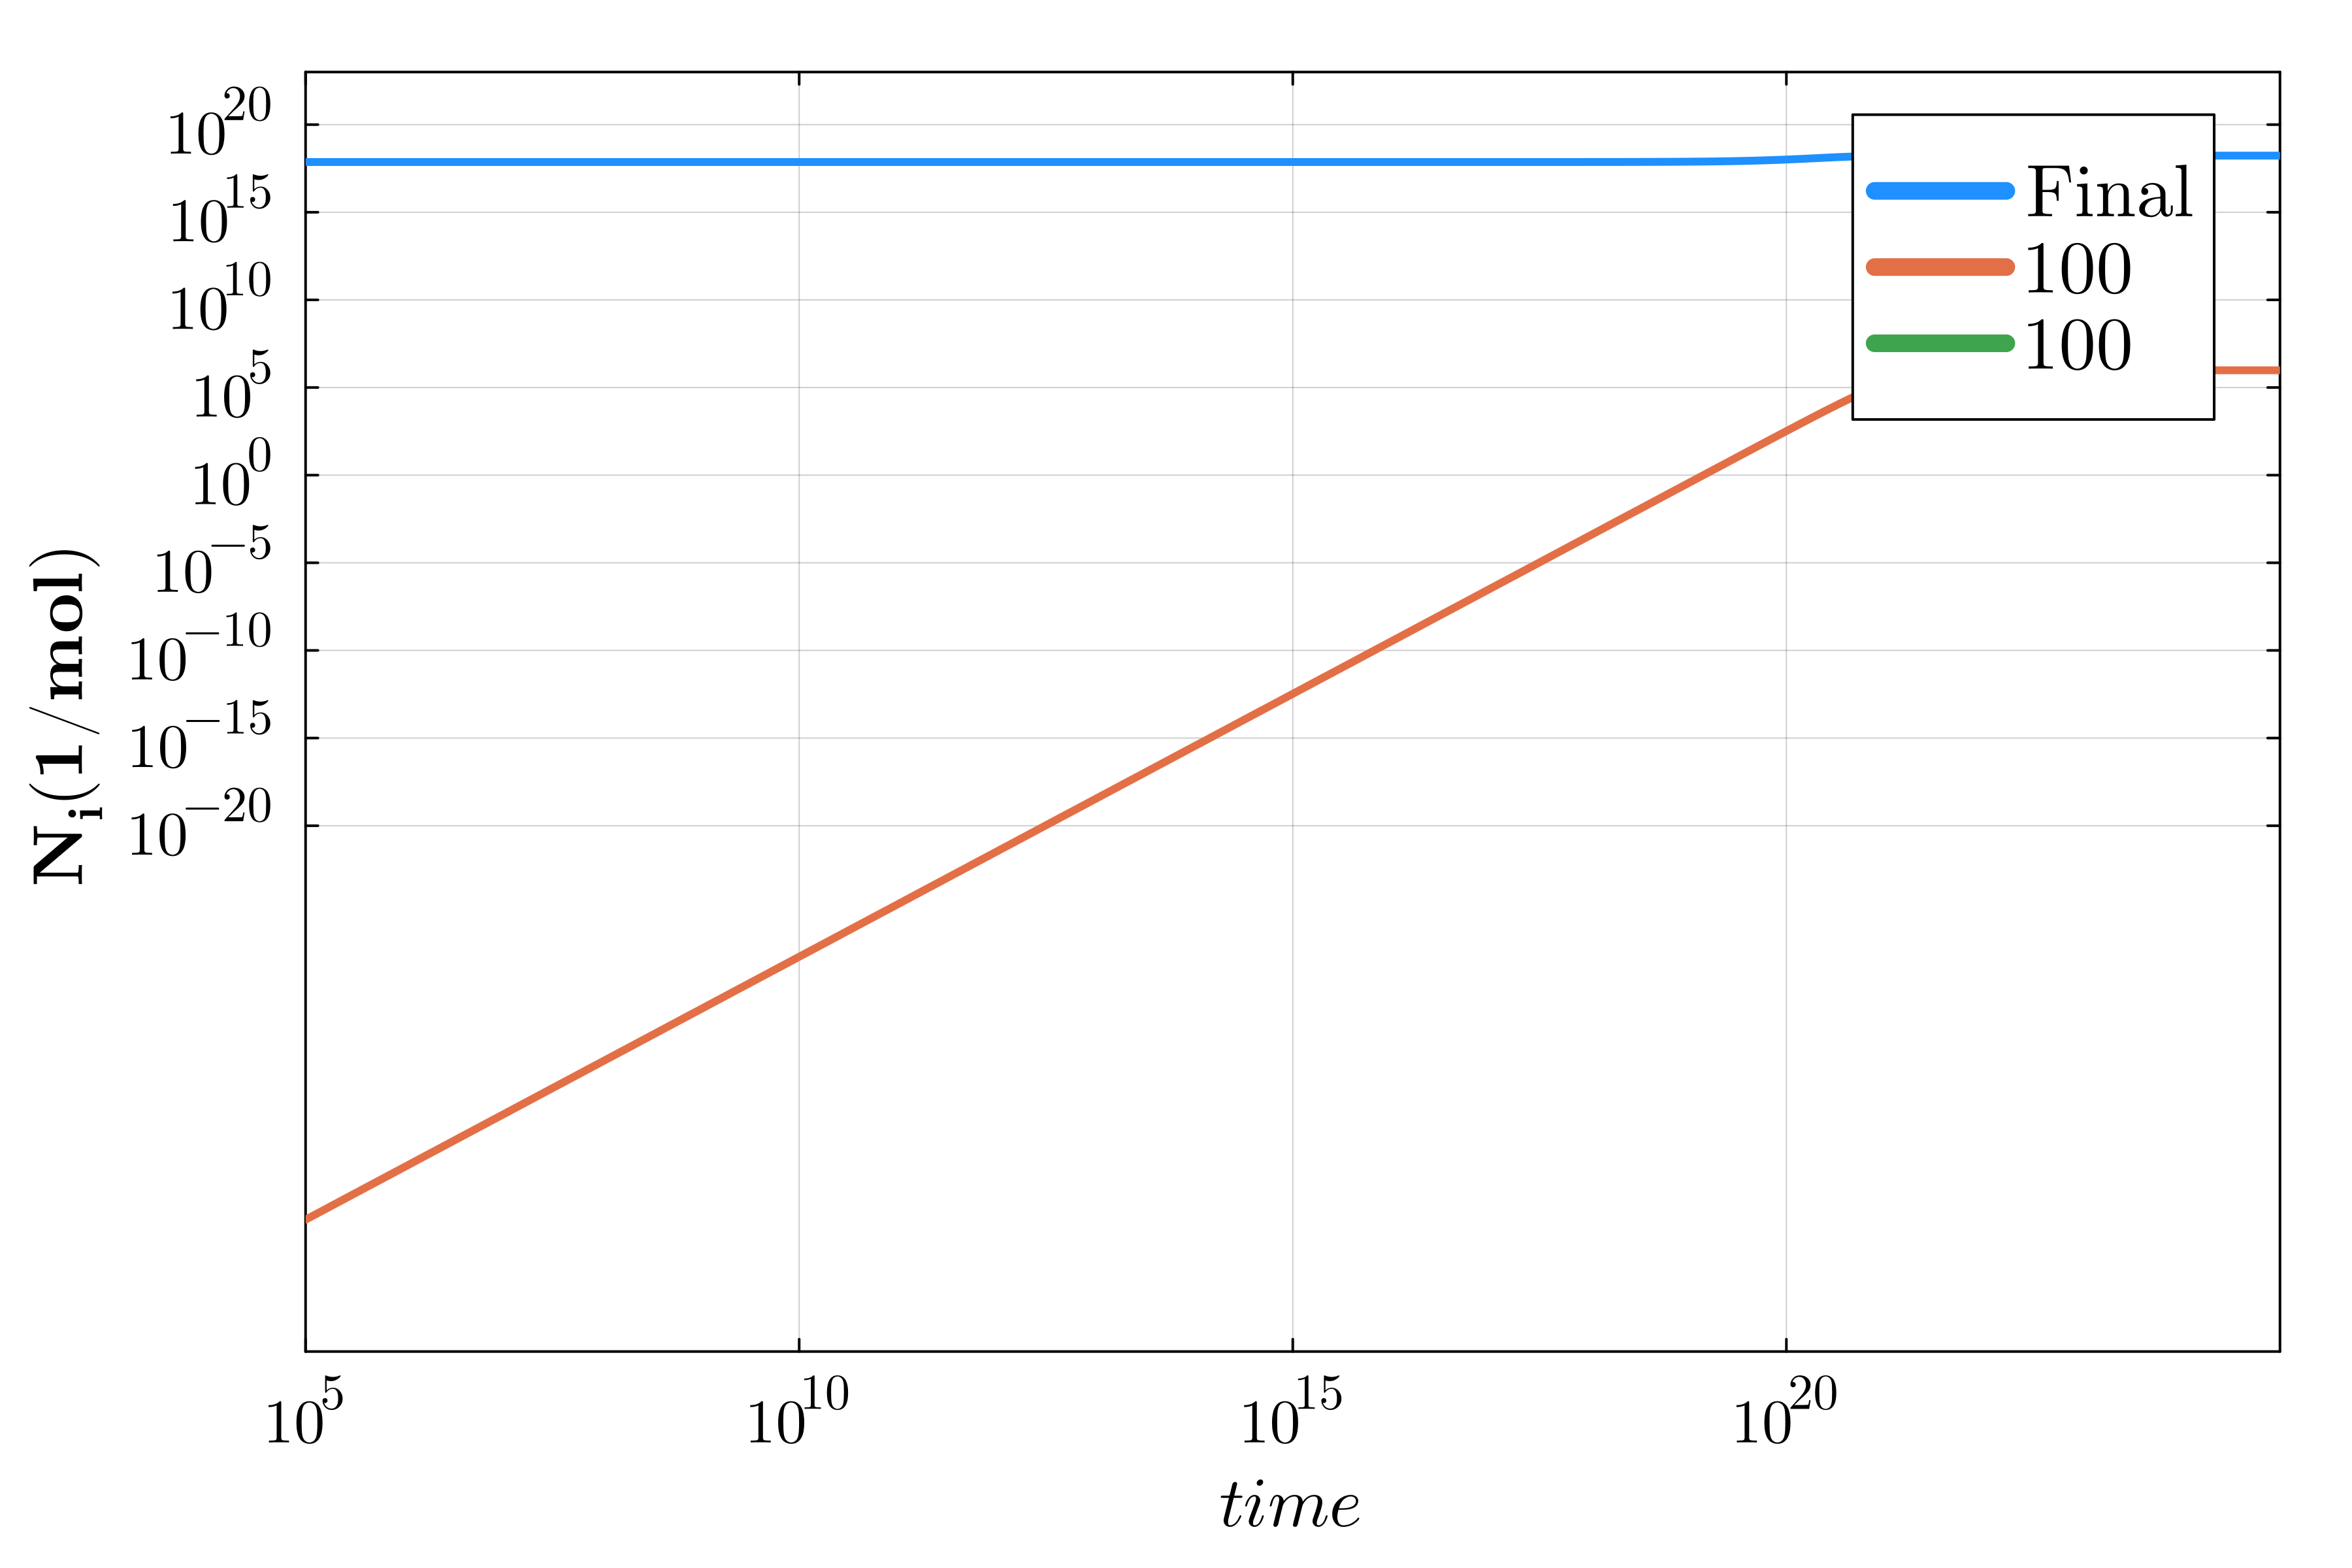

┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /home/alexandre_sureda/.julia/packages/Plots/HyyIK/src/utils.jl:106


In [17]:
using Plots
# Asegúrate de tener LaTeXStrings para usar LaTeX en etiquetas y títulos
using LaTeXStrings

# Establece el backend y el tamaño del gráfico
gr(size=(000, 600))

number_molecules_array = collect(1:MAX_NUMBER_MOLECULES)

# Define colores más atractivos
colores = [:dodgerblue, :coral]

# Ajustes de estilo global para las gráficas
default(
    framestyle=:box,
    legend=:topright,
    line=(:solid, 3),  # Aumenta el grosor de las líneas
    fontfamily="Computer Modern",  # Esto es lo más cercano a un estilo LaTeX clásico
    size=(900, 600),  # Ajusta el tamaño de la gráfica aquí si no se ajustó antes
    dpi=400
)


# Escala de los ejes y etiquetas en formato LaTeX con un tamaño de fuente más grande
plot(solution.t[2:end], solution[2, 2:end],  yscale=:log10,xscale=:log10, label="Final",
    ylims=(1e-50,1e23),xlims = (1e5,1e25) ,yticks=10.0 .^ (-20:5:20), xticks=10.0 .^ (-20:5:20),
    legendfontsize=12, titlefontsize=14, guidefontsize=12, tickfontsize=10,
    margin=5Plots.mm,
    color=colores[1])

plot!(solution.t[2:end], solution[5, 2:end], yscale=:log10, label="100",
)
    
plot!(solution.t[2:end], solution[100, 2:end], yscale=:log10, label="100",
)

# Personalizar aún más con LaTeXStrings si es necesario
plot!(xlabel=L"time", ylabel=L"\mathbf{N_i (1/mol)}",
      legendfontsize=18, guidefontsize=18, tickfontsize=15)

# Mostrar el gráfico


In [44]:
solution.t

419-element Vector{Float64}:
      0.0
      0.02837367775488612
      0.3121104553037473
      3.149478230792359
     31.52315598567847
    315.25993353453964
   3152.6277090231506
  31526.30546390926
 315263.0830127704
      3.1526308585013812e6
      ⋮
      1.0507101449295105e21
      1.343329594583377e21
      2.0018478694894566e21
      3.763500603672168e21
      1.0573919826708055e22
      5.480426200206905e22
      4.97107683755679e23
      4.920141901291779e24
      1.0e25